# Environment Setup

In [1]:
# Check who is the user running Jupyter.
who_am_i = !whoami

# Define our data base path.
base_path_data = '../input' if who_am_i[0] == 'root' else '../../data'

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(base_path_data))

# Any results you write to the current directory are saved as output.

['.DS_Store', 'test.csv', 'csv_submission.csv', 'train.csv', 'gender_submission.csv', 'csv_submission_20181102-0917.csv']


# Data Set Loading

In [3]:
df = pd.read_csv(base_path_data + '/train.csv', sep=",", header=0, encoding='utf-8')
df.shape

(891, 12)

In [4]:
from sklearn.model_selection import train_test_split

# Divide into training and cross-validation datasets.
X_train, X_test, y_train, y_test = train_test_split(df, df.loc[:, 'Survived'], test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 12) (712,)
(179, 12) (179,)


# Statistics

In [5]:
print('Sample')
X_train.shape, X_test.shape

Sample


((712, 12), (179, 12))

In [6]:
print('\nStats')
print(X_train.describe())


Stats
       PassengerId    Survived      Pclass         Age       SibSp  \
count   712.000000  712.000000  712.000000  572.000000  712.000000   
mean    448.234551    0.376404    2.330056   29.498846    0.553371   
std     256.731423    0.484824    0.824584   14.500059    1.176404   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.750000    0.000000    2.000000   21.000000    0.000000   
50%     453.500000    0.000000    3.000000   28.000000    0.000000   
75%     673.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  712.000000  712.000000  
mean     0.379213   32.586276  
std      0.791669   51.969529  
min      0.000000    0.000000  
25%      0.000000    7.925000  
50%      0.000000   14.454200  
75%      0.000000   30.500000  
max      6.000000  512.329200  


In [7]:
# Check which columns have missing data.
print('\nMissing values')
print(X_train.isnull().any())


Missing values
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [8]:
print('Column types')
print(X_train.dtypes)

Column types
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [9]:
# Copied from article: https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation
def num_missing(x):
    return sum(x.isnull())

def print_missing_values(df, axis):
    print("Missing values per %s:" % ('column' if axis == 0 else 'row'))
    print(df.apply(num_missing, axis=axis)[:df.shape[1]]) # axis=0 to apply on each column

# Applying per column
print_missing_values(X_train, 0)

# Applying per row:
print_missing_values(X_train, 1)

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            140
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         2
dtype: int64
Missing values per row:
331    0
733    1
382    1
704    1
813    1
118    0
536    0
361    1
29     2
55     1
865    1
595    1
dtype: int64


In [10]:
{'Survived':X_train.query('Survived == 1').count()[0], 'Did not':X_train.query('Survived == 0').count()[0]}

{'Survived': 268, 'Did not': 444}

In [11]:
# Check people age under 1.
X_train.query('Age < 1')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


# Visualization of Data

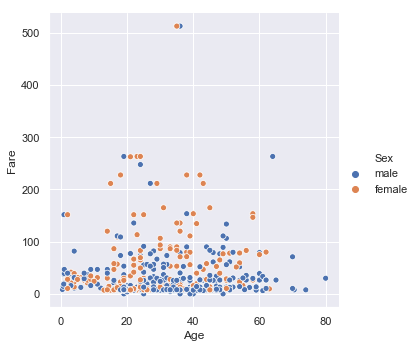

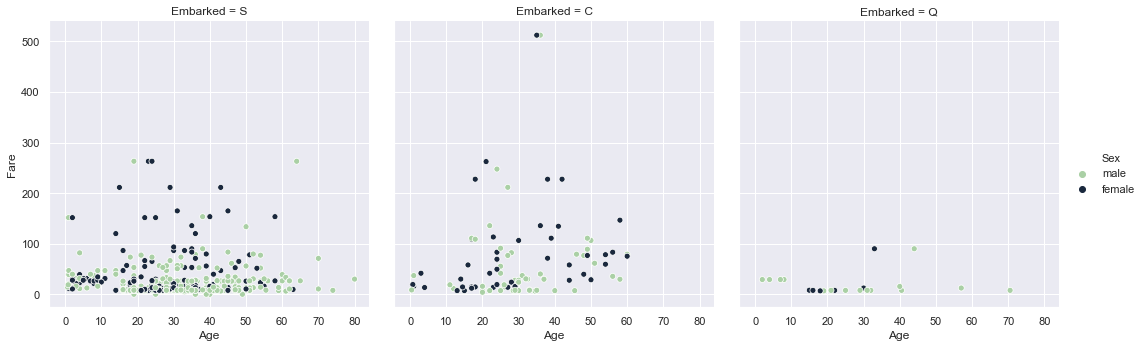

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

# Remove outliers.
# X_train = X_train[X_train.Fare < 300]

# http://seaborn.pydata.org/tutorial/relational.html
sns.relplot(x="Age", y="Fare", hue="Sex", data=X_train) # size="Fare", sizes=(0, 100), 
sns.relplot(x="Age", y="Fare", hue="Sex", col="Embarked", palette="ch:r=-.5,l=.75", data=X_train) # size="Fare", sizes=(0, 100), 
# plt.title('Fare per age')
plt.show()

In [13]:
# Group by age and count to see the distribution.
age_2_count = X_train.groupby('Age')['PassengerId'].count().reset_index(name="Count")

# Transpose for the sake of visibility.
age_2_count.loc[:15,].transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Age,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
Count,1.00,1.00,2.00,1.00,1.00,7.0,10.0,6.0,8.0,2.0,2.0,3.0,4.0,5.0,1.0,3.0


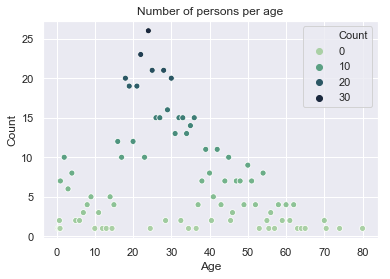

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

# Set the plot.
sns.scatterplot(x="Age", y="Count", hue="Count", palette="ch:r=-.5,l=.75", data=age_2_count) # size="Fare", sizes=(0, 100), 

plt.title('Number of persons per age')
plt.show()

# Preparing Training Data Set

In [15]:
# First keep the columns of interest.

class DataPreparator:
    def trim_columns(self, df):
        _columns_to_keep = list(set(df.columns) - set(['PassengerId', 'Survived', 'Name', 'Cabin']))
        return df.loc[:, _columns_to_keep]

data_prep = DataPreparator()

X_train2 = data_prep.trim_columns(X_train)

# Applying per column:
print_missing_values(X_train2, 0)
print(X_train2.dtypes)

Missing values per column:
Ticket        0
Fare          0
Sex           0
Age         140
SibSp         0
Parch         0
Embarked      2
Pclass        0
dtype: int64
Ticket       object
Fare        float64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
Pclass        int64
dtype: object


In [16]:
df_tmp = pd.get_dummies(X_train2, columns=['Pclass','Sex'])

# Shows only the numeric stats.
df_tmp.describe()

,Fare,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
count,712.000000,572.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,32.586276,29.498846,0.553371,0.379213,0.228933,0.212079,0.558989,0.344101,0.655899
std,51.969529,14.500059,1.176404,0.791669,0.420441,0.409068,0.496857,0.475408,0.475408
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.925000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.454200,28.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,30.500000,38.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,512.329200,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Imputation of Missing Values

In [17]:
print_missing_values(X_train2, 0)

Missing values per column:
Ticket        0
Fare          0
Sex           0
Age         140
SibSp         0
Parch         0
Embarked      2
Pclass        0
dtype: int64


In [18]:
# One method to show entries with NA values for Embarked column.
# nans = lambda df: df[df.isnull().any(axis=1)]
# nans(df_raw.loc[:, ['Embarked']])

# Another method to show entries, not working
# print(df_raw[df_raw['Embarked'].apply(np.isnan)])

# Preferred method to show entries where Embarked is null, NaN, etc.
print(X_train2.query('Embarked != Embarked').loc[:, ['PassengerId', 'Embarked']])
print('\n' + str(X_train2.isnull().any()))

# Show the most frequent value in the features.
X_train2['Age'].mode().values[0]

     PassengerId Embarked
829          NaN      NaN
61           NaN      NaN

Ticket      False
Fare        False
Sex         False
Age          True
SibSp       False
Parch       False
Embarked     True
Pclass      False
dtype: bool


/Users/hujol/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


24.0

In [19]:
from sklearn.impute import SimpleImputer

def impute(df, df_for_fit=None, strategy='mean', column=None):
    """
    Impute the data frame using a strategy on a column.
    
    Parameters
    ----------
    df: DataFrame: the data frame to transform with the fitted value.
    df_for_fit: None or the data frame to fit the Imputer. If None then df is used for fitting.
    strategy: a string for the strategy name defined from sklearn.preprocessing.Imputer.
    column: a string for the name of the column to apply the imputation.
    
    Returns
    -------
    DataFrame: the 'df' with a new column called 'column'_imputed instead of the 'column'.
    
    """
    if df.shape[1] != df_for_fit.shape[1]:
        raise Exception('not same numbers of columns (features)')
    
    # Define the imputer working on columns. 
    imp = SimpleImputer(missing_values=np.nan, strategy=strategy)

    # Get the dataframe used to fit the imputer.
    df_fit = df_for_fit if df_for_fit is None else df

    # Column extractor
    extract_column_df = lambda df: np.array([df[column]]).transpose()
        
    # Fit the imputer.
    df_ = extract_column_df(df_for_fit)
    model = imp.fit(df_)

    # Transform the df.
    df_ = extract_column_df(df)
    res = pd.DataFrame(model.transform(df_))
    res.columns = [column]
    
    # Make a copy to add the new column and remove the old one.
    df_tmp = df.drop(column, axis=1)
    new_column = column + '_imputed'
    df_tmp[new_column] = np.array(res[column])
    
    return df_tmp

# Add the function as a class method to the DataPreparator.
DataPreparator.impute = lambda self, df, df_for_fit, strategy='mean', column=None: impute(df, df_for_fit, strategy, column)

In [20]:
# Proceed to impute the Age column.
# X_aug = X_train2 # pd.concat([X, X_train.loc[:, 'Age']], axis=1)
# print(X_aug['Age'])

# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# cc = 'Age'
# aaa = np.array([X_train2[cc]]).transpose()
# print(aaa.shape)
# model_imp2 = imp.fit(aaa)
# model_imp2.transform(np.array([X_test[cc]]).transpose())

# print(X_train.query('Age != Age').loc[:, ['PassengerId','Age']].iloc[:10, :])
X_imp = data_prep.impute(X_train2, X_train2, column='Age')
# X_imp = data_prep.impute(X_imp, X_train2, column='Cabin', strategy='most_frequent')
X_imp = data_prep.impute(X_imp, X_train2, column='Embarked', strategy='most_frequent')

print(X_train2.shape, X_imp.shape)

print_missing_values(X_imp, 0)

(712, 8) (712, 8)
Missing values per column:
Ticket              0
Fare                0
Sex                 0
SibSp               0
Parch               0
Pclass              0
Age_imputed         0
Embarked_imputed    0
dtype: int64


# General Function to Prepare a Dataset

In [21]:
def create_X(df, features='Sex,Fare'.split(',')):
    """
    Does the one-hot vectorization of features.
    """
    X = df.loc[:, features]

    # Use one-hot encoding for categorical data.
    return pd.get_dummies(X, columns=features)

# Add the one-hot method to the DataPreparator class.
DataPreparator.create_X_dummies = lambda self, df, features=[]: create_X(df, features)    
    
# Prepare the data sets.
X = data_prep.create_X_dummies(X_imp, features=['Pclass', 'Sex', 'Cabin_imputed', 'Embarked_imputed'])
Y = X_train.loc[:, 'Survived']
print(X_imp.shape, X.shape)
X.iloc[:10,:]

(712, 8) (712, 8)


/Users/hujol/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_imputed_C,Embarked_imputed_Q,Embarked_imputed_S
331,1,0,0,0,1,0,0,1
733,0,1,0,0,1,0,0,1
382,0,0,1,0,1,0,0,1
704,0,0,1,0,1,0,0,1
813,0,0,1,1,0,0,0,1
118,1,0,0,0,1,1,0,0
536,1,0,0,0,1,0,0,1
361,0,1,0,0,1,1,0,0
29,0,0,1,0,1,0,0,1
55,1,0,0,0,1,0,0,1


# 5-fold Cross Validation

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import clone

class HelperCrossValidation:
    """
    Helper class for running cross validations.
    """
    def print_features_importance(self, df, clf):
        # Display the features by descending importance.
        df_disp = pd.DataFrame(list(zip(list(df.columns), clf.feature_importances_)))
        df_disp.columns = ['Feature', 'Percentage']
        print(df_disp.sort_values(by='Percentage', ascending=False)[:10].to_string(index=False))

    def cross_val_score_do(self, name, clf, X, Y, cv):
        # Cross validate the classifier.
        scores = cross_val_score(clf, X, Y, cv=cv)
        print("\n%s Score: %.10f" % (name, scores.mean()))

        # Fit the classifier and show the feature importance.
        clf_cloned = clone(clf)
        model = clf_cloned.fit(X, Y)

        # Display the features by descending importance.
        self.print_features_importance(X, clf_cloned)

        return model

In [23]:
# Instanciate a HelperCrossValidation
helper_cv = HelperCrossValidation()

clf_rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=101)
model_rfc = helper_cv.cross_val_score_do('RandomForestClassifier', clf_rfc, X, Y, 5)

clf_etc = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=290)
model_etc = helper_cv.cross_val_score_do('ExtraTreesClassifier', clf_etc, X, Y, 5)

clf_dtc = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=13)
model_dtc = helper_cv.cross_val_score_do('DecisionTreeClassifier', clf_dtc, X, Y, 5)

clf_gbc = GradientBoostingClassifier(n_estimators=70, learning_rate=0.5, max_depth=1, random_state=43)
model_gbc = helper_cv.cross_val_score_do('GradientBoostingClassifier', clf_gbc, X, Y, 5)

# SGDClassifier(max_iter=5)


RandomForestClassifier Score: 0.8160517137
Feature  Percentage
          Sex_male    0.489151
          Pclass_3    0.183827
        Sex_female    0.171449
          Pclass_2    0.058173
          Pclass_1    0.043007
Embarked_imputed_S    0.026061
Embarked_imputed_C    0.021794
Embarked_imputed_Q    0.006536

ExtraTreesClassifier Score: 0.8160517137
Feature  Percentage
          Sex_male    0.384145
        Sex_female    0.309638
          Pclass_3    0.096891
          Pclass_1    0.093059
          Pclass_2    0.049651
Embarked_imputed_Q    0.023964
Embarked_imputed_C    0.021914
Embarked_imputed_S    0.020738

DecisionTreeClassifier Score: 0.8160517137
Feature  Percentage
          Sex_male    0.704569
          Pclass_3    0.197417
Embarked_imputed_S    0.046769
          Pclass_1    0.041679
Embarked_imputed_C    0.007613
Embarked_imputed_Q    0.001279
          Pclass_2    0.000674
        Sex_female    0.000000

GradientBoostingClassifier Score: 0.7809676489
Feature    Percent

# ROC Visualization

LogisticRegression Accuracy :0.787921348314607


/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hujol/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/hujol/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.

dtc Accuracy :0.816011235955056
etc Accuracy :0.816011235955056
gbc Accuracy :0.780898876404494
rfc Accuracy :0.816011235955056


/Users/hujol/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/hujol/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/hujol/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depreca

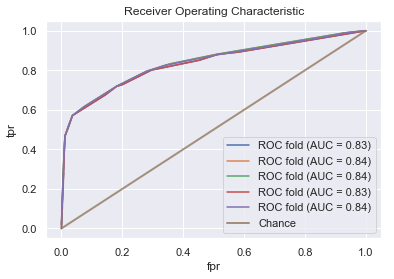

In [24]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Model.
ppp = LogisticRegression(penalty='l2', C=0.1)

def plot_roc(models={}, X=None, Y=None):
    for name in models:
        model = models[name]
        
        # Evaluate.
        y_pred_proba = model.predict_proba(X)[::, 1] # Dont know why take index=1 or 0?!?!
        print("%s Accuracy :%.15f" % (name, metrics.accuracy_score(Y, model.predict(X))))

        # Compute the probabilities.
        fpr, tpr, _ = metrics.roc_curve(Y, y_pred_proba, pos_label=1)
        roc_auc = metrics.auc(fpr, tpr)

        # Plot the ROC.
        fpr_tpr = pd.DataFrame(list(zip(fpr.ravel(), tpr.ravel())))
        fpr_tpr.columns = [ 'fpr', 'tpr']
        sns.lineplot(x="fpr", y="tpr", data=fpr_tpr, label='ROC fold (AUC = %0.2f)' % (roc_auc))

    sns.lineplot([0, 1], [0, 1], linestyle='--', lw=2, label='Chance', alpha=.8)
    plt.legend(loc=4)
    plt.title('Receiver Operating Characteristic')
    plt.show()

model = ppp.fit(X, Y)
    
plot_roc({'LogisticRegression' : model, 'dtc' : model_dtc, 'etc' : model_etc, 'gbc' : model_gbc, 'rfc' : model_rfc}, X, Y)

# 5-fold Cross Validation with GridSearch

In [25]:
from sklearn.model_selection import GridSearchCV

def do_cross_validation(clf, X, Y, k):
    """
    Run the k-fold GridSearchCV on X and Y
    
    Parameters
    ----------
    clf: the original classifier to clone for testing the hyperparameters.
    X: the data set to use for splitting into training and cross validation datasets.
    Y: the labels.
    k; the number of cross validation datasets split from X.
    
    Returns
    -------
    clf: the best classifier after evaluating all the possible hyperparameter settings.
    
    """
    parameters = {'max_features': [1, len(X.columns)], 'n_estimators': [5, 50, 250, 400, 1000]}

    clf_cv = GridSearchCV(clf, parameters, cv=k)

    %timeit
    clf_model = clf_cv.fit(X, Y)

    # Display the scores.
#     for row in clf_model.cv_results_:
#         print(row)

    return clf_model.best_estimator_

clf = do_cross_validation(clf_etc, X, Y, 5)

# Evaluation of the Classifier

In [26]:
from sklearn.metrics import confusion_matrix

# Print features importance.
helper_cv.print_features_importance(X, clf)

Feature  Percentage
        Sex_female    0.371410
          Sex_male    0.328471
          Pclass_3    0.113454
          Pclass_1    0.101877
          Pclass_2    0.033720
Embarked_imputed_S    0.025540
Embarked_imputed_C    0.018695
Embarked_imputed_Q    0.006833


In [27]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def display_metrics(clf, X, Y):
    # Predict the values on X.    
    X_prediction = clf.predict(X)

    print("Score: %.15f" % clf.score(X, Y))

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(Y, X_prediction)
    # tn, fp, fn, tp = cnf_matrix.ravel()

    # Compute confusion matrix
    np.set_printoptions(precision=2)

    class_names = ['Did Not', 'Survived']

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

Score: 0.816011235955056
Confusion matrix, without normalization
[[428  16]
 [115 153]]
Normalized confusion matrix
[[0.96 0.04]
 [0.43 0.57]]


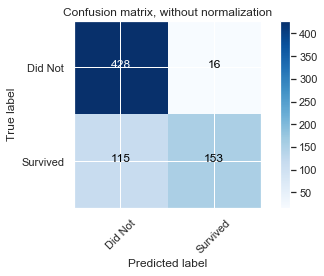

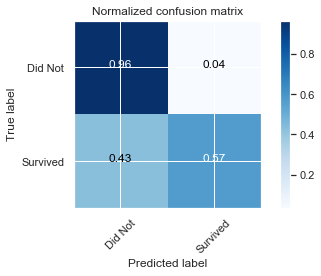

In [28]:
display_metrics(clf, X, Y)

# Test on X_test Dataset

In [29]:
# Create the test sets.
Yt = y_test

X_test_1 = data_prep.trim_columns(X_test)
print(X_test_1.columns)

X_test_imp = impute(X_test_1, X_test_1, column='Age')
# X_test_imp = data_prep.impute(X_test_imp, X_test_1, column='Cabin', strategy='most_frequent')
X_test_imp = data_prep.impute(X_test_imp, X_test_1, column='Embarked', strategy='most_frequent')

Xt = data_prep.create_X_dummies(X_test_imp, features=['Pclass', 'Sex', 'Cabin_imputed', 'Embarked_imputed'])
print(X_test_1.shape, Xt.shape, X.shape)

# print_missing_values(Xt, 0)

# print(Xt.shape, X_test_imp.columns)

Index(['Ticket', 'Fare', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Pclass'], dtype='object')
(179, 8) (179, 8) (712, 8)


/Users/hujol/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [30]:
print(Xt.shape)

# Show the result.
# print_missing_values(Xt, axis=0) #axis=0 defines that function is to be applied on each column

# Run the CV.
clf_impured_1 = do_cross_validation(clf, Xt, Yt, 5)

(179, 8)


Score: 0.793296089385475
Feature  Percentage
          Sex_male    0.433132
          Pclass_1    0.231469
        Sex_female    0.219758
          Pclass_3    0.057558
Embarked_imputed_C    0.025645
Embarked_imputed_Q    0.011959
          Pclass_2    0.011600
Embarked_imputed_S    0.008878
Score: 0.793296089385475
Confusion matrix, without normalization
[[98  7]
 [30 44]]
Normalized confusion matrix
[[0.93 0.07]
 [0.41 0.59]]


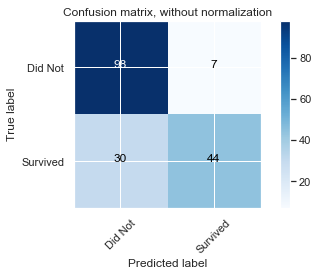

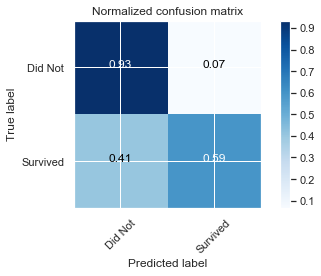

In [31]:
# Score
print("Score: %.15f" % clf_impured_1.score(Xt, Yt))

# Print features importance.
helper_cv.print_features_importance(Xt, clf_impured_1)

# Display metrics.
display_metrics(clf_impured_1, Xt, Yt)

# CSV of Test Data Set Prediction

In [32]:
# Load the test set.
df_test_raw = pd.read_csv(base_path_data + '/test.csv', sep=",", header=0, encoding='utf-8')

print(df_test_raw.isna().any())
print(df_test_raw.dtypes)

# Show the result.
print_missing_values(df_test_raw, 0)

# print(df_test_raw.iloc[:10,])
df_test_raw.query('Fare != Fare')

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Missing values per column:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [33]:
from sklearn.preprocessing import Imputer

df_test_raw_1 = data_prep.trim_columns(df_test_raw)
df_test_raw_1.columns

df_test_raw_imp = impute(df_test_raw_1, df_test_raw_1, column='Age')
# df_test_raw_imp = data_prep.impute(df_test_raw_imp, df_test_raw_1, column='Cabin', strategy='most_frequent')
df_test_raw_imp = data_prep.impute(df_test_raw_imp, df_test_raw_1, column='Embarked', strategy='most_frequent')

Xt_raw = data_prep.create_X_dummies(df_test_raw_imp, features=['Pclass', 'Sex', 'Cabin_imputed', 'Embarked_imputed'])
print(df_test_raw_imp.shape, Xt_raw.shape)

(418, 8) (418, 8)


/Users/hujol/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [34]:
# Show the result.
print_missing_values(Xt_raw, 0)

Missing values per column:
Pclass_1              0
Pclass_2              0
Pclass_3              0
Sex_female            0
Sex_male              0
Embarked_imputed_C    0
Embarked_imputed_Q    0
Embarked_imputed_S    0
dtype: int64


In [35]:
X_test_given_predicted = clf_impured_1.predict(Xt_raw)

# print(X_test.iloc[:10,])

In [36]:
import datetime

df_to_submit = pd.DataFrame(list(zip(df_test_raw.loc[:,'PassengerId'], X_test_given_predicted)))
df_to_submit.columns = ['PassengerId', 'Survived']
df_to_submit.PassengerId = df_to_submit.PassengerId.astype(np.int32)
df_to_submit.Survived = df_to_submit.Survived.astype(np.int32)

today = datetime.datetime.today()
today_s = today.strftime('%Y%m%d-%H%M')

csv_dest = "%s/csv_submission_%s.csv" % (base_path_data, today_s)

# Save the CSV
df_to_submit.to_csv(csv_dest, index=False)

print("test prediction save in:\n %s" % csv_dest)

test prediction save in:
 ../../data/csv_submission_20181102-0918.csv
